# Importing the necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd #data-wrangling library
import matplotlib.pyplot as plt #data-visualization library
import seaborn as sns #data-visualization library
import numpy as np
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
# KNN model
#Add these imports to the top of page
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, plot_confusion_matrix
import pickle


# Data Interpretation

In [3]:
#This will read the csv file. First we will import the data from csv file.
df = pd.read_csv('chocolate.csv')

In [4]:
#To understand the data set
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


#This will give the info about the dataset
df.info()

In [5]:
#Desribe is used to understand the data variance and distribution
#df.describe(include="all")

In [6]:
#This will change the column names to given names
df.columns=['Company','Specific Bean','REF','Review Date','Cocoa Percent','Company Location','Rating','Bean Type','Bean origin']

In [7]:
df

,Company,Specific Bean,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


# Analysing the dataset through visualizations

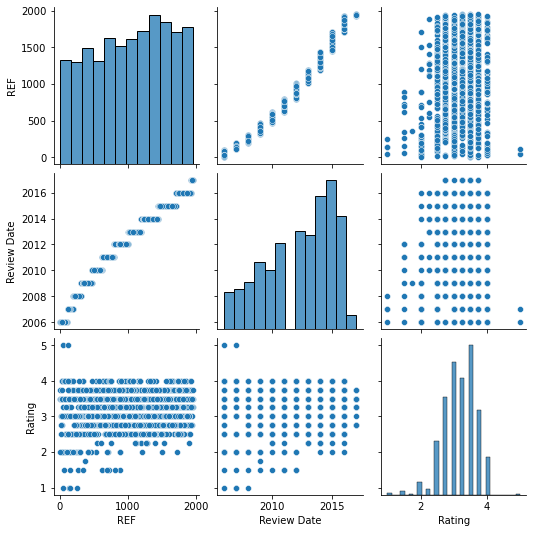

In [8]:
df.shape
sns.pairplot(df)

Text(0.5, 1.0, 'Top 5 Locations with maximum number of companies')

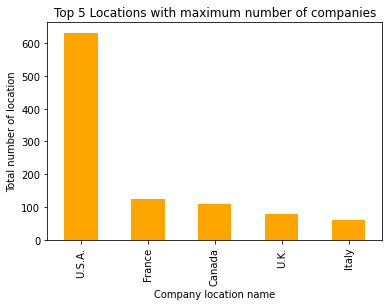

In [9]:
#creating visualizations for individual columns
age_bin = 10
company=df['Company Location'].value_counts().sort_values(ascending=False).head(5)
company.plot(kind='bar', color='orange',legend=None)
plt.xlabel('Company location name')
plt.ylabel('Total number of location')
plt.title('Top 5 Locations with maximum number of companies')

Text(0.5, 1.0, 'Top 5 companies selling chocolates ')

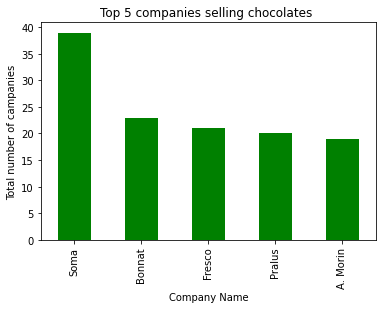

In [10]:
#creating visualizations for individual columns
age_bin = 10
company=df['Company'].value_counts().sort_values(ascending=False).head(5)
company.plot(kind='bar', color='green',legend=None)
plt.xlabel('Company Name')
plt.ylabel('Total number of campanies')
plt.title('Top 5 companies selling chocolates ')

Text(0.5, 1.0, 'Top 5 Origin of beans')

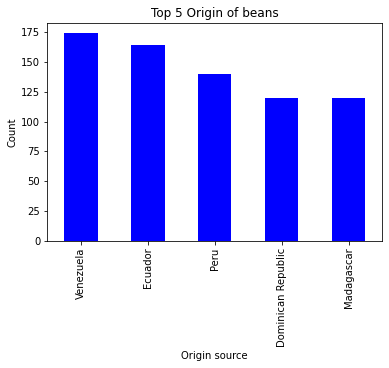

In [11]:
#creating visualizations for individual columns
age_bin = 10
company=df['Bean origin'].value_counts().sort_values(ascending=False).head(5)
company.plot(kind='bar', color='blue',legend=None)
plt.xlabel('Origin source')
plt.ylabel('Count')
plt.title('Top 5 Origin of beans')

Text(0.5, 1.0, 'Top 5 Bean types')

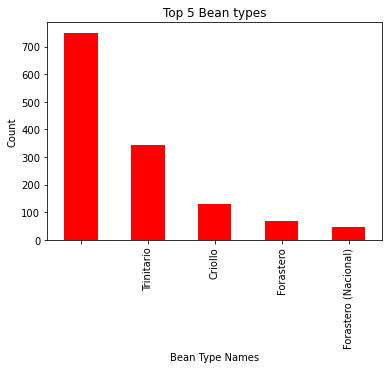

In [12]:
#creating visualizations for individual columns
age_bin = 10
company=df['Bean Type'].value_counts().sort_values(ascending=False).head(5)
company.plot(kind='bar', color='red',legend=None)
plt.xlabel('Bean Type Names')
plt.ylabel('Count')
plt.title('Top 5 Bean types')

C:\Users\prati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cocoa percentage as per rating')

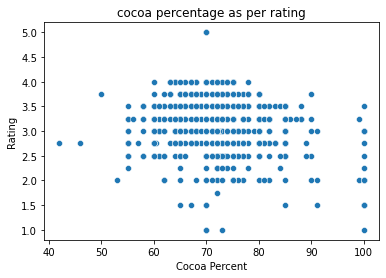

In [13]:
#scatterplot to define cocoa percentage as per rating
sns.scatterplot(df['Cocoa Percent'].apply(lambda x: float(x.split('%')[0])), df['Rating']);
plt.title('cocoa percentage as per rating')

# Step 1 : Data Cleaning 

In [14]:
# Dropping the column Specific Bean Origin or Bar Name because it is irrelevant as it's representing similar 
#information with Bean origin and REF is refectled in Review date
df.drop(['Specific Bean','REF'],axis=1,inplace=True)

In [15]:
#Now for cleaning the variables and checking if there is any impossible values/extra white spaces present in the categorical variables

df['Bean Type'].value_counts()

                            750
Trinitario                  342
Criollo                     128
Forastero                    67
Forastero (Nacional)         46
Blend                        34
Criollo, Trinitario          33
Forastero (Arriba)           32
Trinitario, Criollo           9
Forastero (Parazinho)         8
Criollo (Porcelana)           8
Forastero (Arriba) ASS        6
Beniano                       3
EET                           3
Nacional (Arriba)             3
Criollo, Forastero            2
Amazon mix                    2
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Matina                        2
Criollo (Ocumare 61)          2
Trinitario (Amelonado)        1
Trinitario, Forastero         1
Trinitario (Scavina)          1
CCN51                         1
Trinitario, TCGA              1
Criollo (Ocumare 77)          1
Criollo (Amarru)              1
Forastero (Catongo)           1
Criollo (Wild)                1
Forastero, Trinitario         1
Foraster

In [16]:
#For the company table, check if there is any inconsistent or irrelevant information in the variables or if any variable is repeated
print(df['Company'].sort_values().unique())

['A. Morin' 'AMMA' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao'
 "Akesson's (Pralus)" 'Alain Ducasse' 'Alexandre' 'Altus aka Cao Artisan'
 'Amano' 'Amatller (Simon Coll)' 'Amazona' 'Ambrosia' 'Amedei' 'Anahata'
 'Ara' 'Arete' 'Artisan du Chocolat' 'Artisan du Chocolat (Casa Luker)'
 'Askinosie' 'Bahen & Co.' 'Bakau' 'Bar Au Chocolat' "Baravelli's" 'Batch'
 'Beau Cacao' 'Beehive' 'Belcolade' 'Bellflower' 'Belyzium'
 'Benoit Nihant' 'Beschle (Felchlin)' 'Bisou' 'Bittersweet Origins'
 'Black Mountain' 'Blanxart' 'Blue Bandana' 'Bonnat'
 'Bouga Cacao (Tulicorp)' 'Bowler Man' "Brasstown aka It's Chocolate"
 'Brazen' 'Bright' 'Britarev' 'Bronx Grrl Chocolate' 'Burnt Fork Bend'
 'C-Amaro' 'Cacao Arabuco' 'Cacao Atlanta' 'Cacao Barry' 'Cacao Hunters'
 'Cacao Market' 'Cacao Prieto' 'Cacao Sampaka' 'Cacao Store'
 'Cacao de Origen' 'Cacaoyere (Ecuatoriana)' 'Callebaut' 'Cao'
 'Caoni (Tulicorp)' 'Captain Pembleton' 'Caribeans' 'Carlotta Chocolat'
 'Castronovo' 'Cello' 'Cemoi' 'Chaleur B' 'Charm 

In [17]:
#To remove the white spaces and the information given in the brackets for some companies as it is irrelevant. Also some special characters are present,
#hence replacing them
df['Company'] = df['Company'].str.replace(r'[^(]*\(|\)[^)]*', '')
df['Company'] = df['Company'].str.replace('Na�ve','Naive')
df['Company'] = df['Company'].str.replace('[^\w\s]','')
df['Company'] = df['Company'].str.replace('  ','')

In [18]:
#Let's fill na with the mode again...
df["Bean Type"].isna().sum()

1

In [19]:
#This will replace all the null values into nan
df = df.replace('\xa0', np.nan)

In [20]:
# Data cleaning regarding the Broad Bean Origin column as there are lot of spelling mistakes
print ("Before Cleaning bean origin column: ")
print (df['Bean origin'].unique())
df['Bean origin'] = df['Bean origin'].replace('Domincan Republic', 'Dominican Republic')
df['Bean origin'] = df['Bean origin'].replace('Carribean(DR/Jam/Tri)', 'Carribean')
df['Bean origin'] = df['Bean origin'].replace('Trinidad-Tobago', 'Trinidad, Tobago')
df['Bean origin'] = df['Bean origin'].replace("Peru, Mad., Dom. Rep.", "Peru, Madagascar, Dominican Republic")
df['Bean origin'] = df['Bean origin'].replace("Central and S. America", "Central and South America")
df['Bean origin'] = df['Bean origin'].replace("PNG, Vanuatu, Mad", "Papua New Guinea, Vanuatu, Madagascar")
df['Bean origin'] = df['Bean origin'].replace("Ven., Trinidad, Mad.", "Venezuela, Trinidad, Madagascar")
df['Bean origin'] = df['Bean origin'].replace("Ven.,Ecu.,Peru,Nic.", "Venezuela, Ecuador, Peru, Nicaragua")
df['Bean origin'] = df['Bean origin'].replace("Ven, Trinidad, Ecuador","Venezuela, Trinidad, Ecuador")
df['Bean origin'] = df['Bean origin'].replace("Ghana, Domin. Rep", "Ghana, Dominican Republic")
df['Bean origin'] = df['Bean origin'].replace("Ecuador, Mad., PNG","Ecuador, Madagascar, Papua New Guinea")
df['Bean origin'] = df['Bean origin'].replace("Mad., Java, PNG","Madagascar, Java, Papua New Guinea")
df['Bean origin'] = df['Bean origin'].replace("Gre., PNG, Haw., Haiti, Mad", "Grenada, Papua New Guinea, Hawaii, Haiti, Madagascar")

print ("After Cleaning bean origin column: ")
print (df['Bean origin'].unique())

Before Cleaning bean origin column: 
['Madagascar' nan 'Costa Rica' 'Nicaragua' 'Colombia' 'Ecuador' 'Trinidad'
 'Venezuela' 'Dominican Republic' 'Peru' 'Peru, Mad., Dom. Rep.'
 'Domincan Republic' 'Jamaica' 'Vietnam' 'Mexico' 'Honduras' 'Guatemala'
 'Sri Lanka' 'Indonesia' 'Puerto Rico' 'St. Lucia' 'Hawaii'
 'Peru, Ecuador' 'Ghana' 'Brazil' 'Ivory Coast' 'Uganda' 'Samoa'
 'Tanzania' 'Papua New Guinea' 'Togo' 'Bolivia' 'Panama' 'Belize'
 'Vanuatu' 'Fiji' 'Peru, Madagascar' 'Central and S. America' 'Tobago'
 'Sao Tome' 'Trinidad, Tobago' 'Cuba' 'Ven, Bolivia, D.R.'
 'Sao Tome & Principe' 'Carribean' 'Venezuela, Dom. Rep.'
 'Dominican Rep., Bali' 'Ghana, Panama, Ecuador' 'Grenada' 'Principe'
 'Venezuela, Trinidad' 'Australia' 'South America' 'Colombia, Ecuador'
 'Ecuador, Costa Rica' 'South America, Africa' 'Malaysia' 'Congo'
 'PNG, Vanuatu, Mad' 'Gre., PNG, Haw., Haiti, Mad' 'Haiti' 'Philippines'
 'Ven., Trinidad, Mad.' 'Suriname' 'Peru, Ecuador, Venezuela' 'Martinique'
 'Dom. Rep., Mad

In [21]:
#Replacing the % in Cocoa Percent as it is not a string field 
df["Cocoa Percent"]=df["Cocoa Percent"].str.replace("%","").astype(float)
df["Cocoa Percent"]=df["Cocoa Percent"]/100

In [22]:
#For company location, first check all the unique values and replace if there is unneccesary characters in the values
print(df['Company Location'].nunique())
print(df['Company Location'].sort_values().unique())
df['Company Location'].value_counts()

57
['Amsterdam' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bolivia'
 'Brazil' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Czech Republic'
 'Denmark' 'Domincan Republic' 'Ecuador' 'Fiji' 'France' 'Germany' 'Ghana'
 'Grenada' 'Guatemala' 'Honduras' 'Hungary' 'Iceland' 'India' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Lithuania' 'Madagascar' 'Martinique' 'Mexico'
 'Netherlands' 'New Zealand' 'Nicaragua' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Puerto Rico' 'Russia' 'Sao Tome' 'Scotland' 'Singapore'
 'South Africa' 'South Korea' 'Spain' 'St. Lucia' 'Suriname' 'Sweden'
 'Switzerland' 'U.K.' 'U.S.A.' 'Venezuela' 'Vietnam' 'Wales']


U.S.A.               632
France               124
Canada               108
U.K.                  79
Italy                 59
Ecuador               47
Australia             46
Belgium               33
Switzerland           29
Germany               27
Colombia              22
Austria               22
Spain                 20
Hungary               19
New Zealand           17
Japan                 17
Venezuela             16
Denmark               14
Peru                  14
Brazil                14
Madagascar            13
Guatemala              9
Costa Rica             8
Israel                 8
Scotland               8
Vietnam                7
Argentina              7
Poland                 6
Honduras               6
Lithuania              5
Domincan Republic      5
Nicaragua              5
South Korea            5
Sweden                 5
Netherlands            4
Mexico                 3
Grenada                3
Fiji                   3
Amsterdam              3
Puerto Rico            3


In [23]:
#For bean origin, first check all the unique values and replace if there is unneccesary characters in the values
print(df['Bean origin'].sort_values().unique())
df['Bean origin'].value_counts()

['Africa, Carribean, C. Am.' 'Australia' 'Belize' 'Bolivia' 'Brazil'
 'Burma' 'Carribean' 'Central and South America' 'Colombia'
 'Colombia, Ecuador' 'Congo' 'Cost Rica, Ven' 'Costa Rica' 'Cuba'
 'DR, Ecuador, Peru' 'Dom. Rep., Madagascar' 'Dominican Rep., Bali'
 'Dominican Republic' 'Ecuador' 'Ecuador, Costa Rica'
 'Ecuador, Madagascar, Papua New Guinea' 'El Salvador' 'Fiji' 'Ghana'
 'Ghana & Madagascar' 'Ghana, Dominican Republic' 'Ghana, Panama, Ecuador'
 'Grenada' 'Grenada, Papua New Guinea, Hawaii, Haiti, Madagascar'
 'Guatemala' 'Haiti' 'Hawaii' 'Honduras' 'India' 'Indonesia'
 'Indonesia, Ghana' 'Ivory Coast' 'Jamaica' 'Liberia' 'Madagascar'
 'Madagascar & Ecuador' 'Madagascar, Java, Papua New Guinea' 'Malaysia'
 'Martinique' 'Mexico' 'Nicaragua' 'Nigeria' 'Panama' 'Papua New Guinea'
 'Papua New Guinea, Vanuatu, Madagascar' 'Peru' 'Peru, Belize'
 'Peru, Dom. Rep' 'Peru, Ecuador' 'Peru, Ecuador, Venezuela'
 'Peru, Madagascar' 'Peru, Madagascar, Dominican Republic' 'Philippines'
 '

Venezuela                       174
Ecuador                         164
Peru                            140
Dominican Republic              136
Madagascar                      120
                               ... 
Venezuela, Trinidad, Ecuador      1
Dominican Rep., Bali              1
Venez,Africa,Brasil,Peru,Mex      1
Ghana, Panama, Ecuador            1
Peru, Ecuador, Venezuela          1
Name: Bean origin, Length: 89, dtype: int64

In [24]:
#For bean type, first check all the unique values and group by all th types into specific categories such as 
#grouping Amazon categories into one variable
print(df['Bean Type'].sort_values().unique())
df['Bean Type'].value_counts()

['Amazon mix' 'Amazon, ICS' 'Beniano' 'Blend' 'Blend-Forastero,Criollo'
 'CCN51' 'Criollo' 'Criollo (Amarru)' 'Criollo (Ocumare 61)'
 'Criollo (Ocumare 67)' 'Criollo (Ocumare 77)' 'Criollo (Porcelana)'
 'Criollo (Wild)' 'Criollo, Forastero' 'Criollo, Trinitario' 'EET'
 'Forastero' 'Forastero (Arriba)' 'Forastero (Arriba) ASS'
 'Forastero (Arriba) ASSS' 'Forastero (Catongo)' 'Forastero (Nacional)'
 'Forastero (Parazinho)' 'Forastero, Trinitario' 'Matina' 'Nacional'
 'Nacional (Arriba)' 'Trinitario' 'Trinitario (85% Criollo)'
 'Trinitario (Amelonado)' 'Trinitario (Scavina)' 'Trinitario, Criollo'
 'Trinitario, Forastero' 'Trinitario, Nacional' 'Trinitario, TCGA' nan]


Trinitario                  342
Criollo                     128
Forastero                    67
Forastero (Nacional)         46
Blend                        34
Criollo, Trinitario          33
Forastero (Arriba)           32
Trinitario, Criollo           9
Criollo (Porcelana)           8
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Nacional (Arriba)             3
Criollo, Forastero            2
Amazon mix                    2
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Matina                        2
Criollo (Ocumare 61)          2
Trinitario (Amelonado)        1
Trinitario, Forastero         1
Trinitario (Scavina)          1
CCN51                         1
Trinitario, TCGA              1
Criollo (Ocumare 77)          1
Criollo (Amarru)              1
Forastero (Catongo)           1
Criollo (Wild)                1
Forastero, Trinitario         1
Forastero (Arriba) ASSS       1
Nacional

In [25]:
# Replacing the bean type as these belong to the same type
df['Bean Type'] = df['Bean Type'].replace('Forastero (Arriba) ASSS', 'Forastero (Arriba)')
df['Bean Type'] = df['Bean Type'].replace('Forastero (Arriba) ASS', 'Forastero (Arriba)')
print (df['Bean Type'].unique())

['Criollo, Trinitario' 'Blend' 'Matina' nan 'CCN51' 'Forastero (Arriba)'
 'Trinitario' 'Criollo' 'Amazon mix' 'Nacional' 'Forastero (Nacional)'
 'Forastero' 'Criollo (Ocumare 61)' 'Trinitario, Criollo'
 'Trinitario (85% Criollo)' 'Criollo (Amarru)' 'Beniano'
 'Forastero (Parazinho)' 'Criollo (Porcelana)' 'Criollo (Ocumare 67)'
 'Criollo (Wild)' 'Nacional (Arriba)' 'Criollo, Forastero' 'Amazon, ICS'
 'Blend-Forastero,Criollo' 'Trinitario (Amelonado)' 'EET'
 'Trinitario, TCGA' 'Forastero, Trinitario' 'Trinitario, Nacional'
 'Trinitario, Forastero' 'Trinitario (Scavina)' 'Criollo (Ocumare 77)'
 'Forastero (Catongo)']


In [26]:
# This step is being done to create a dictionary after grouping the bean types into 6 categories for easier encoding. This dictionary is 
# then mapped to a new column and after that the former column has been dropped.
dict_type = {'Amazon':'Forastero', 
                  'Amazon mix':'Forastero',
                  'Amazon, ICS':'Forastero',
                  'Beniano':'Forastero',
                  'Blend':'Blend',
                  'Blend-Forastero,Criollo':'Blend',
                  'CCN51':'hybrid',
                  'Criollo':'Criollo',
                  'Criollo (Amarru)':'Criollo',
                  'Criollo (Ocumare 61)':'Hybrid',
                  'Criollo (Ocumare 67)':'Hybrid',
                  'Criollo (Ocumare 77)':'Hybrid',
                  'Criollo (Ocumare)':'Hybrid',
                  'Criollo (Porcelana)':'Criollo',
                  'Criollo (Wild)':'Criollo',
                  'Criollo, +':'Criollo',
                  'Criollo, Forastero':'Blend',
                  'Criollo, Trinitario':'Blend',
                  'EET':'Hybrid',
                  'Forastero':'Forastero',
                  'Forastero (Amelonado)':'Forastero',
                  'Forastero (Arriba)':'Forastero',
                  'Forastero (Arriba) ASS':'Forastero',
                  'Forastero (Arriba) ASSS':'Forastero',
                  'Forastero (Catongo)':'Forastero',
                  'Forastero (Nacional)':'Forastero',
                  'Forastero (Parazinho)':'Forastero',
                  'Forastero(Arriba, CCN)':'Hybrid',
                  'Forastero, Trinitario':'Blend',
                  'Matina':'Hybrid',
                  'Nacional':'Forastero',
                  'Nacional (Arriba)':'Forastero',
                  'Trinitario':'Trinitario',
                  'Trinitario (85% Criollo)':'Blend',
                  'Trinitario (Amelonado)':'Trinitario',
                  'Trinitario (Scavina)':'Trinitario',
                  'Trinitario, Criollo':'Blend',
                  'Trinitario, Forastero':'Blend',
                  'Trinitario, Nacional':'Blend',
                  'Trinitario, TCGA':'Trinitario',
                  'blend':'Blend'}
df['Bean Type Varieties'] = df['Bean Type'].map(dict_type)
df['Bean Type Varieties'] = df["Bean Type Varieties"].fillna("Trinitario")
df.drop(['Bean Type'],axis=1,inplace=True)


In [27]:
#Replacing the bean origin with the median value
df["Bean origin"] = df["Bean origin"].fillna("Venezuela")

In [28]:
#Fix columns in df_country_ratings to match mappings
df['Company Location'] = df['Company Location'].replace("Wales", "U.K.")
df['Company Location'] = df['Company Location'].replace("Amsterdam", "Netherlands")
df['Company Location'] = df['Company Location'].replace("Scotland", "U.K.")
df['Company Location'] = df['Company Location'].replace("Domincan Republic", "Dominican Republic")


In [29]:
#Created a method to define rating in a more refined manner
def ratings(rating):
    if rating < 0.5: 
        return 0
    elif rating < 1.5: 
        return 1 
    elif rating < 2.5: 
        return 2
    elif rating < 3.5: 
        return 3
    elif rating < 4.5: 
        return 4 
    elif rating < 5.5: 
        return 5
df["Rating"] = df["Rating"].apply(lambda x: ratings(x))    

In [30]:
#Checking the rating column
df['Rating'] = df['Rating']

#  Step 2 : Few analysis before data conversion using encoding as most of the categorical values will be converted into numerical values

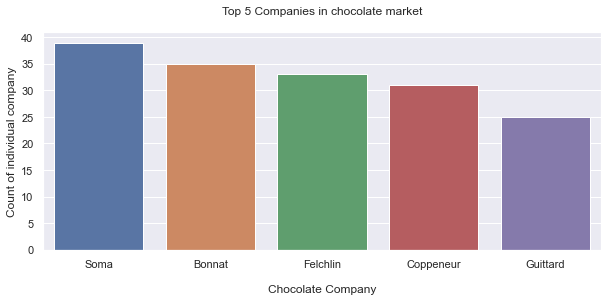

In [31]:
#Now it is time to analyse the data with the help of visualizations to understand the data properly
# Top 5 companies in terms of chocolate sale in this dataset
d = df['Company'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Count of individual company")
plt.title("Top 5 Companies in chocolate market\n")
plt.show()

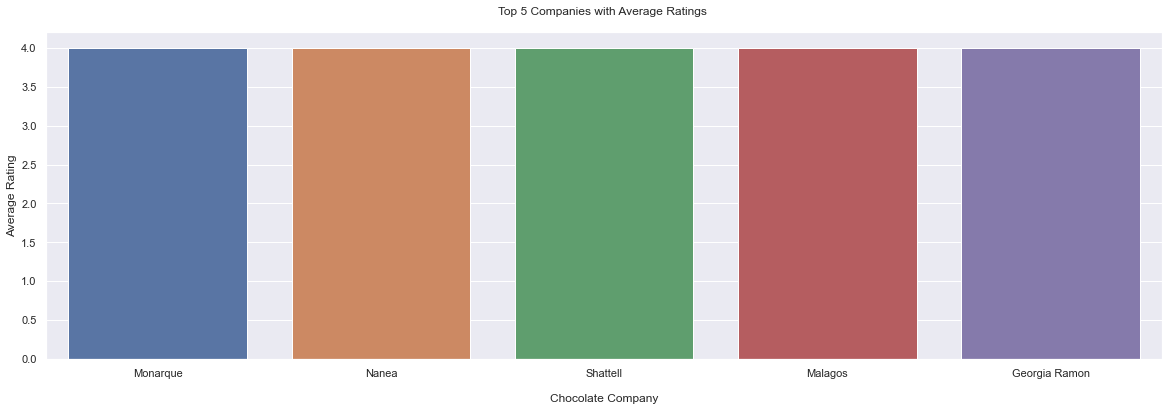

In [32]:
# Top 5 companies in terms of average ratings
d2 = df.groupby('Company').aggregate({'Rating':'mean'})
d2 = d2.sort_values('Rating', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='Company', y='Rating', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies with Average Ratings \n")
plt.show()

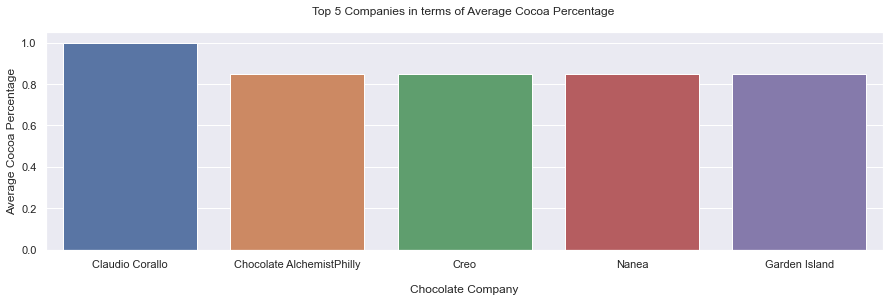

In [33]:

# Top 5 companies in terms of average Cocoa Percentage
d2 = df.groupby('Company').aggregate({'Cocoa Percent':'mean'})
d2 = d2.sort_values('Cocoa Percent', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x='Company', y='Cocoa Percent', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 5 Companies in terms of Average Cocoa Percentage \n")
plt.show()

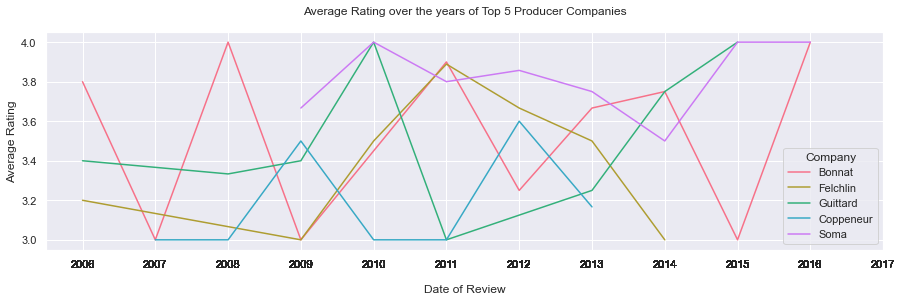

In [34]:
# Average rating over the years of Top 5 Producer Companies

top5_dict = {}
for element in list(d['index']):
    temp = df[df['Company']==element]
    top5_dict[element]=temp

top5_list = list(top5_dict.keys())

### Rating patterns over the years
d7 = df.groupby(['Review Date', 'Company']).aggregate({'Rating':'mean'})
d7 = d7.reset_index()
d7 = d7[d7['Company'].isin(top5_list)]

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review Date', y='Rating', hue="Company", data=d7, palette="husl")
ax.set(xticks=df['Review Date'].values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years of Top 5 Producer Companies\n")
plt.show()

In [35]:
# Preparing Soma for analysis
soma = df[df['Company']=='Soma']

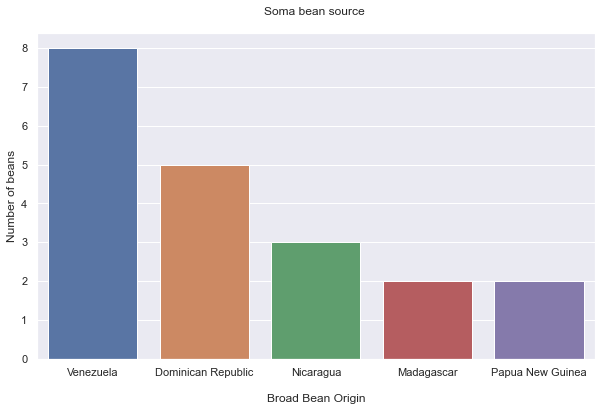

In [36]:
### Source of beans for soma
dSoma = soma['Bean origin'].value_counts().sort_values(ascending=False).head(5)
dSoma = pd.DataFrame(dSoma)
dSoma = dSoma.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Bean origin', data=dSoma)
plt.xlabel("\nBroad Bean Origin")
plt.ylabel("Number of beans")
plt.title("Soma bean source \n")
plt.show()

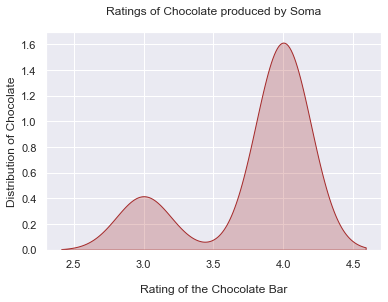

In [37]:
### Ratings of Soma

sns.kdeplot(soma['Rating'], legend=False, color="brown", shade=True)
plt.xlabel("\nRating of the Chocolate Bar")
plt.ylabel("Distribution of Chocolate")
plt.title("Ratings of Chocolate produced by Soma\n")
plt.show()

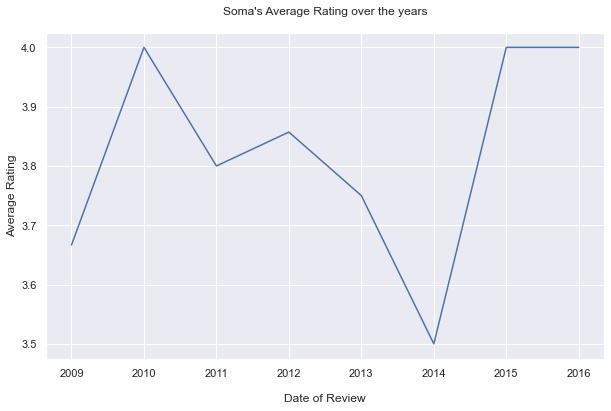

In [38]:
### Soma's performance over the years
d4 = soma.groupby('Review Date').aggregate({'Rating':'mean'})
d4 = d4.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review Date', y='Rating', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Soma's Average Rating over the years\n")
plt.show()

Top Chocolate Producing Countries in the World

U.S.A.    632
France    124
Canada    108
U.K.       88
Italy      59
Name: Company Location, dtype: int64


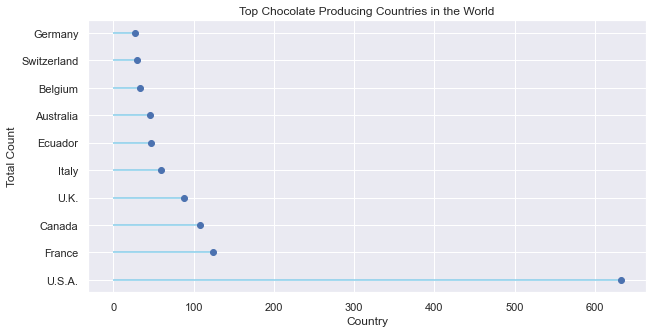

In [39]:

# Countries

print ('Top Chocolate Producing Countries in the World\n')
country=list(df['Company Location'].value_counts().head(10).index)
choco_bars=list(df['Company Location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(df['Company Location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

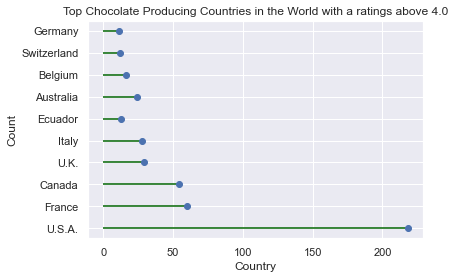

{'U.S.A.': 218, 'France': 60, 'Canada': 54, 'U.K.': 29, 'Italy': 28, 'Ecuador': 13, 'Australia': 24, 'Belgium': 16, 'Switzerland': 12, 'Germany': 11}


In [40]:
#reusing code written before
countries=country
best_choc={} # empty dictionary
for j in countries:
    c=0
    b=df[df['Company Location']==j]
    br=b[b['Rating']>=4] # rating more than 4
    for i in br['Rating']:
        c+=1
        best_choc[j]=c    
li=best_choc.keys()
# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Count')
plt.title("Top Chocolate Producing Countries in the World with a ratings above 4.0")
plt.show()
print(best_choc)

# Performed hot encoding for categorical data

In [41]:
#Created a method for converting categorical values into numerical using dummies
categorical_features = ['Company','Company Location','Bean origin','Bean Type Varieties']
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data
df_clean = df
df = onehot_encode(df, categorical_features)

In [42]:
df

,Review Date,Cocoa Percent,Rating,A Morin,AMMA,Acalli,Adi,Ah Cacao,Alain Ducasse,Alexandre,...,"Venezuela, Trinidad, Ecuador","Venezuela, Trinidad, Madagascar",Vietnam,West Africa,Blend,Criollo,Forastero,Hybrid,Trinitario,hybrid
0,2007,0.64,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014,0.80,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2011,0.70,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,0.70,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016,0.65,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2011,0.70,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1496,2012,0.58,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1497,2009,0.64,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1498,2010,0.72,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step 3 - Selected ANN, Random Forest and KNN as three algorithms for comparision

# Step 4 - Data partitioning

In [43]:
#Defined X as input columns and y as output column
X = df.drop('Rating', axis = 1)
y = df['Rating']
#splitting of data into training and test data
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state=42)
#splitting of data into training and valiadtion data
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75, random_state=4)

# Step 5 - Model Development for Artificial Neural Network

In [44]:
# Merge inputs and targets
inputs = np.concatenate((x_train, x_cv), axis=0)
targets = np.concatenate((y_train, y_cv), axis=0)
fold_no = 3
# Define the K-fold Cross Validator
kfold = KFold(n_splits=fold_no, shuffle=True)
mse_per_fold=[]
loss_per_fold=[]
acc_per_fold=[]
# K-fold Cross Validation model evaluation applied a loop for 
while fold_no < 6:

    for train, test in kfold.split(inputs, targets):
        def build_model():
            model = keras.Sequential([
            layers.Dense(64, activation='relu', input_dim=501),
            layers.Dense(64, activation='relu'),
            layers.Dense(125, activation='relu'),
            layers.Dense(1)
            ])

            optimizer = tf.keras.optimizers.RMSprop(0.001)

            model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse','acc'])
            return model
        model = build_model()

        EPOCHS = 1000
    model = build_model()

# The patience parameter is the amount of epochs to check for improvement
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')
    
      # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')


    history = model.fit(inputs[test], targets[test], 
                    epochs=EPOCHS, validation_split = 0.2, verbose=1, 
                    callbacks=[early_stop])
          # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print('------------------------------------------------------------------------')
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}; {model.metrics_names[2]} of {scores[2]}')
    acc_per_fold.append(scores[2])
    loss_per_fold.append(scores[0])
    mse_per_fold.append(scores[1])

  # Increase fold number
    fold_no = fold_no + 1
print('------------------------------------------------------------------------')
print("Average Accuracy for all the folds" +" - "+ str(np.mean(acc_per_fold)))
print('------------------------------------------------------------------------')
print("Average loss for all the folds"  +" - "+ str(np.mean(loss_per_fold)))
print('------------------------------------------------------------------------')
print("Average mse for all the folds"  +" - "+ str(np.mean(mse_per_fold)))

NameError: name 'keras' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.legend(['Train Data', 'Validation Data'], loc='upper right')
plt.title("Plot of Model loss for validatiton and training data")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

# Model Development for KNN

In [45]:

#Create a Kneighbors classifer, use training data to fit model

knn = KNeighborsClassifier()
knn_trained = knn.fit(x_train, y_train)
y_test_pred = knn_trained.predict(x_test)

#print accuracy
acc = accuracy_score(y_test, y_test_pred)
print(acc)

0.5366666666666666


In [46]:
#run 3 iterations of CV = 3 to 5
#find most optimal parameter n and run between values 6-10
#best iteration was when CV=4, n=9 for all cross folds

n=[6,7,8,9,10]


cv5_scores = []
#find best_n value when running through cross_val_score 6-10 when num-folds = 5
for best_n in n:
    knn = KNeighborsClassifier(n_neighbors=best_n)
    scores = cross_val_score(knn, x_cv, y_cv, cv=5, scoring='accuracy')
    cv5_scores.append(scores.mean())
    print (scores)

n_best = n[np.argmax(cv5_scores)]
print('cv_scores:', cv5_scores)
print('n_best:', n_best)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.6        0.55       0.56666667 0.61666667 0.58333333]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.65       0.53333333 0.6        0.61666667 0.56666667]
[0.61666667 0.55       0.63333333 0.6        0.61666667]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.6        0.5        0.63333333 0.58333333 0.58333333]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.56666667 0.51666667 0.63333333 0.55       0.6       ]
cv_scores: [0.5833333333333333, 0.5933333333333334, 0.6033333333333333, 0.5800000000000001, 0.5733333333333334]
n_best: 8


In [47]:
#find best n when num-folds = 4
cv4_scores = []
for best_n in n:
    knn = KNeighborsClassifier(n_neighbors=best_n)
    scores = cross_val_score(knn, x_cv, y_cv, cv=4, scoring='accuracy')
    cv4_scores.append(scores.mean())
    print (scores)

n_best = n[np.argmax(cv4_scores)]
print('cv_scores:', cv4_scores)
print('n_best:', n_best)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


[0.61333333 0.58666667 0.6        0.6       ]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


[0.65333333 0.53333333 0.6        0.57333333]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


[0.64       0.56       0.6        0.54666667]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


[0.6        0.54666667 0.61333333 0.58666667]


C:\Users\prati\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


[0.58666667 0.52       0.6        0.57333333]
cv_scores: [0.6, 0.59, 0.5866666666666667, 0.5866666666666667, 0.57]
n_best: 6


In [ ]:
#find best n when num-folds = 3
cv3_scores = []
for best_n in n:
    knn = KNeighborsClassifier(n_neighbors=best_n)
    scores = cross_val_score(knn, x_cv, y_cv, cv=3, scoring='accuracy')
    cv3_scores.append(scores.mean())
    print (scores)

n_best = n[np.argmax(cv3_scores)]
print('cv_scores:', cv3_scores)
print('n_best:', n_best)

In [ ]:
#n_best is 9 over n-folds 3 to 5, use this on knn
knn = KNeighborsClassifier(n_neighbors=9)
knn_trained = knn.fit(x_train, y_train)

#performance assessment:
y_test_pred = knn_trained.predict(x_test)
acc = accuracy_score(y_test, y_test_pred)
print(acc)

# Model development for Random Forest

In [ ]:
# RFC model
#Add these imports to the top of page
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RFC

# random forest model creation 
#Create a Random forest classfier, use training data to fit model 

rf = RFC(n_estimators=50, random_state=7) 

rf.fit(x_train, y_train) 

ypredict_val=rf.predict(x_cv)
acc_val = accuracy_score(y_test,ypredict_val)*100
print("RF Accuracy_val: %.3f" % acc_val)

#rf = RFC(n_estimators=50,random_state=7)

In [ ]:
#run 3 iterations of CV = 3 to 5
#find most optimal parameter and run between values 6-10
#best iteration was when CV=4, n=9 for all cross folds
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation
import numpy as np
depths = range(6, 10)
print (depths)
cv_scores = []
for maxDepth in depths:
    rf = RFC(max_depth = maxDepth)
    #print('train: %s, test: %s' % (x_train, x_cv))
    #print('Target on validated data',ypredict_val)
    acc_val = accuracy_score(y_test,ypredict_val)*100
    print("RF Accuracy_val: %.3f" % acc_val)
    scores = cross_val_score(rf, x_cv, y_cv, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    print (scores)
maxDepth_best = depths[np.argmax(cv_scores)] #Returns the indices of the maximum values along an axis.
print ('cv_scores:', cv_scores)
print ('maxDepth_best:', maxDepth_best)

In [ ]:
cv_4 =[]
for maxDepth in depths:
    rf = RFC(max_depth = maxDepth)
    #print('train: %s, test: %s' % (x_train, x_cv))
    #print('Target on validated data',ypredict_val)
    acc_val = accuracy_score(y_test,ypredict_val)*100
    print("RF Accuracy_val: %.3f" % acc_val)
    scores = cross_val_score(rf, x_cv, y_cv, cv=4, scoring='accuracy')
    cv_4.append(scores.mean())
    print (scores)
maxDepth_best = depths[np.argmax(cv_4)] #Returns the indices of the maximum values along an axis.
print ('cv_scores:', cv_4)
print ('maxDepth_best:', maxDepth_best)

In [ ]:
cv_5=[]
for maxDepth in depths:
    rf = RFC(max_depth = maxDepth)
    #print('train: %s, test: %s' % (x_train, x_cv))
    #print('Target on validated data',ypredict_val)
    acc_val = accuracy_score(y_test,ypredict_val)*100
    print("RF Accuracy_val: %.3f" % acc_val)
    scores = cross_val_score(rf, x_cv, y_cv, cv=5, scoring='accuracy')
    cv_5.append(scores.mean())
    print (scores)
maxDepth_best = depths[np.argmax(cv_5)] #Returns the indices of the maximum values along an axis.
print ('cv_scores:', cv_5)
print ('maxDepth_best:', maxDepth_best)


In [ ]:
#maxDepthbest is 9 over n-folds 3 to 5, use this on rfc
rf = RFC(maxDepth_best)
rfc_trained= rf.fit(x_train, y_train)

#performance assessment:
y_test_predict = rfc_trained.predict(x_cv)
acc = accuracy_score(y_test, y_test_predict)
print(acc)

# Step 6 : Applying the KNN model on test data which has highest accuracy

In [ ]:
#we'll also run n=10 as well just to see if we have a better result
#don't bother running 6-8 as they don't perform as well based off kfold cv
knn = KNeighborsClassifier(n_neighbors=10)
knn_trained10 = knn.fit(x_train, y_train)

#performance assessment:
y_test_pred = knn_trained10.predict(x_test)
acc = accuracy_score(y_test, y_test_pred)
print(acc)

In [ ]:
#print confusion matrix + plot
print(multilabel_confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(knn_trained, x_test, y_test)

# Saving the selected model into model.pickle file

In [ ]:
#dump knn model to a saved file in current directory
pickle.dump(knn_trained10, open('model.pickle', 'wb'))

In [ ]:
#load model to see if saved properly
loaded_model = pickle.load(open('model.pickle', 'rb'))

In [ ]:
#check result is the same for reproducability
result = loaded_model.score(x_test, y_test)
print(result)

# Step 7 : Chocolate Rating mapped geographically

In [ ]:
import pandas as pd
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)

In [ ]:
#dataset source: https://www.kaggle.com/juanumusic/countries-iso-codes
world_df = pd.read_csv('wikipedia-iso-country-codes.csv')
world_df = world_df.rename(columns={'English short name lower case': 'Country', 'Alpha-3 code': 'Code'})
world_df = world_df.drop(['Alpha-2 code', 'Numeric code', 'ISO 3166-2'], axis=1)
world_df.head()

In [ ]:
#Fix columns in df_country_ratings to match mappings
world_df['Country'] = world_df['Country'].replace("Saint Lucia", "St. Lucia")
world_df['Country'] = world_df['Country'].replace("United Kingdom", "U.K.")
world_df['Country'] = world_df['Country'].replace("United States Of America", "U.S.A.")
world_df['Country'] = world_df['Country'].replace("Sao Tome and Principe", "Sao Tome")
world_df['Country'] = world_df['Country'].replace("Korea, Republic of (South Korea)", "South Korea")

In [ ]:
#select only company location and ratings
df_country_ratings = df_clean[['Company Location', 'Rating']]

In [ ]:
#get the mean of each country's ratings
df_gp_country_ratings = df_country_ratings.groupby(['Company Location', 'Rating']).sum().reset_index().groupby('Company Location').mean()

In [ ]:
#reset the current index set as company location so we can use this column in future
df_gp_country_ratings =df_gp_country_ratings.reset_index()
#check for num of countries
df_gp_country_ratings.shape

In [ ]:
checkna = pd.merge(df_gp_country_ratings, world_df, left_on='Company Location', right_on='Country', how='left')

In [ ]:
#merge both world dataframe column and our dataset by company location
df_gp_country_ratings = df_gp_country_ratings.merge(world_df, left_on='Company Location', right_on='Country', how='left')

In [ ]:
df_country_ratings_mapping = df_gp_country_ratings.drop(['Country'], axis=1)

In [ ]:
df_country_ratings_mapping

In [ ]:
#check for data loss post-join
df_country_ratings_mapping.shape

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = df_country_ratings_mapping['Code'],
    z = df_country_ratings_mapping['Rating'],
    text = df_country_ratings_mapping['Company Location'],
    colorscale = 'Earth',
    reversescale=True,
    marker_line_width=0.5,
    colorbar_title = 'Ratings across the world',
))


In [ ]:
fig.show()

# Finding corelation among columns and most important feature

In [ ]:
#To show the correlation of several numerical columns
# correlation matrix 
correlation_matrix = df_clean.corr()
correlation_matrix.style.background_gradient(axis=0, low=0.75, high=1.0) 

In [ ]:
#feature importance of random forest

#feature importance graph for random forest for first suit
def featureimportance(model, X_train1, y_train1):
    
    models = RFC()
    models.fit(x_train, y_train)
    data = pd.DataFrame(models.feature_importances_, x.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[6,6])
    sns.barplot(x='index', y='feature', data=data[:10], palette="Greens_d")
    plt.title('Feature importance of Random Forest')
    plt.xticks(rotation=55)
    plt.show();
featureimportance(RFC, y_train,y_cv )  